What is missing?

- Checking the target distribution, imbalanced or not?
- Some plots to find the correlation among some features and the target (lmplot, and some scatterplot, or boxplots)
- Cardinalities in categorical features
- Check for duplicates


In [10]:
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

### **Importing libraries**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import histogram_feature, correlation_matrix

### **Importing Data**

In [ ]:
weather_data = pd.read_csv("../data/raw/weather_classification_data.csv")
weather_data.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


### **Understanding the dataset**

In [13]:
weather_data.shape

(13200, 11)

In [14]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


- Within the **features** we have 4 **categorical** columns and 7 **numerical** columns
- As we can see we don't have any **null values** in the dataset

In [15]:
weather_data.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

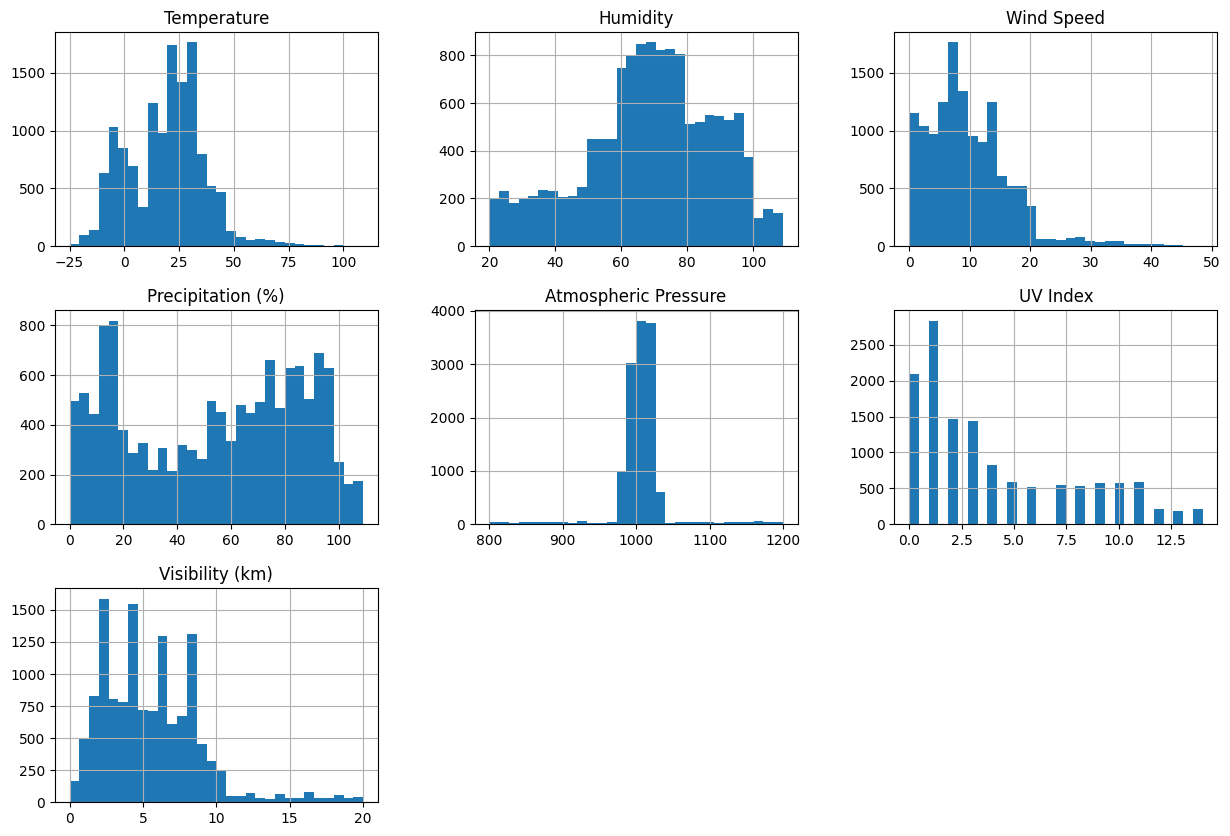

In [16]:
histogram_feature(data=train_data)

There are several numerical features distribution that caught our attention and can be considered as outliers in our dataset: 

- Temperature highest record is 56.7 Celsius degrees and in this dataset are values that are going above

- Humidity is a percentual value, and are values that are higher than 100%. Same with the precipitation feature

- The normal sea-level pressure is 1013 hPa, and the highest one ever registered is 1084 hPa in the Everest, and there are some values a lot higher and some also too low, everything below 950 hPa should be also considered as outliers.

Skewed features:

- Wind Speed (to the right)

- UV Index (to the right)

- Visibility (to the right)

### **Removing outliers**

In [22]:
# Making a copy
weather_data_clean = weather_data.copy()

# Remove unrealistic temperature values
weather_data_clean = weather_data_clean[~(weather_data_clean['Temperature'] > 55)]

# Remove invalid humidity values
weather_data_clean = weather_data_clean[~(weather_data_clean['Humidity'] > 100)]

# Remove invalid precipitation values
weather_data_clean = weather_data_clean[~(weather_data_clean['Precipitation (%)'] > 100)]

# Keep only realistic atmospheric pressure values (950–1013 hPa)
weather_data_clean = weather_data_clean[
    (weather_data_clean['Atmospheric Pressure'] >= 950) &
    (weather_data_clean['Atmospheric Pressure'] <= 1013)
]
weather_data_clean.reset_index(drop=True, inplace=True)
weather_data_clean.shape

(7389, 11)

In [23]:
weather_data_clean.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
3,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
4,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
5,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
6,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
7,-10.0,87,15.0,67.0,overcast,986.19,0,Winter,1.5,inland,Snowy
8,10.0,50,6.5,46.0,partly cloudy,1000.44,2,Summer,8.5,mountain,Cloudy
9,33.0,51,0.5,27.0,overcast,1009.18,3,Autumn,5.5,coastal,Cloudy


### **Checking for duplicates**

In [27]:
weather_data_clean.duplicated().sum()

np.int64(0)

- We don't have any **duplicate** in out dataframe

### **Feature Correlation**

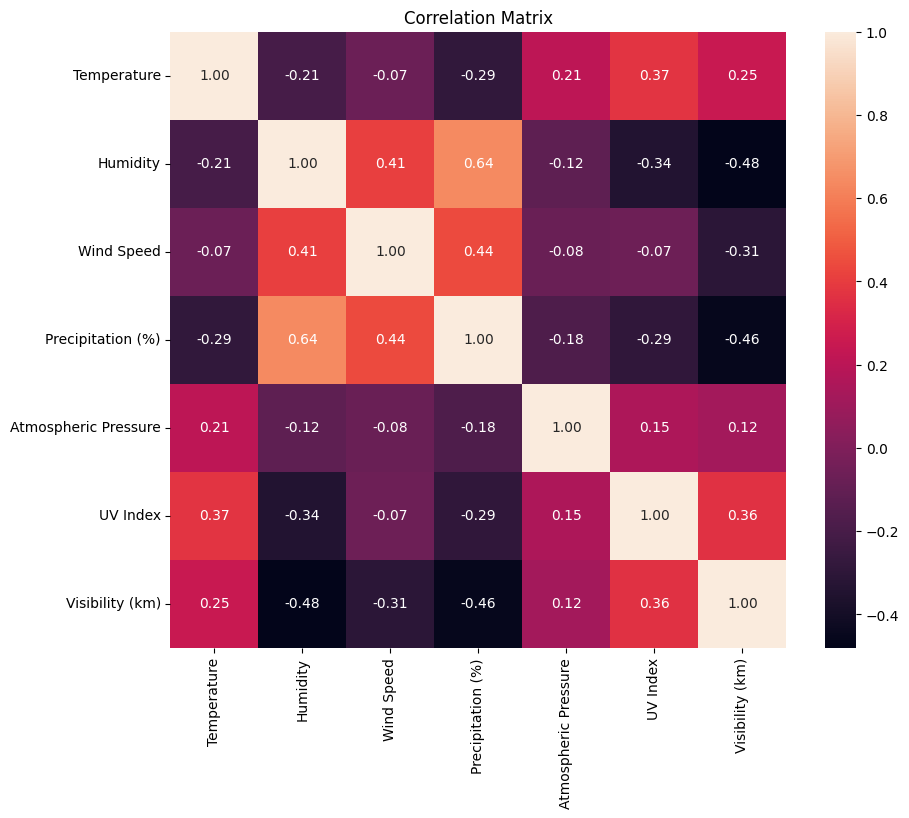

In [24]:
correlation_matrix(data=train_data)

- There are 2 features that doesn't have any linear correlation (Pearson's matrix) with the others: **Student_ID** (obviously) and the **age** (maybe because age is a constant through all the dataset, we have the same amount of students that are 18, 19 ... and 24 y/o)
- We have strong positive correlation among the **certifications**, **projects** and **coding_skills** features. Also among **CGPA** and **Aptitude_Test_Score**